In [1]:
import os
import sys

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [7]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from tqdm.notebook import tqdm
import pickle
%matplotlib inline

In [13]:
import barcodes
from cka import cka

In [14]:
def get_rnd_idx(size_before, size_after):
    idx = list(range(size_before))
    np.random.shuffle(idx)
    return idx[:size_after]

In [19]:
barcs1 = []
barcs2 = []

data = []
data_emb = []

for i in range(10):
    A = pickle.load(open('/dsprites-dataset/sample_base_%d.pickle' % i, 'rb'))
    rnd_idx = get_rnd_idx(A.shape[0], 2000)
    B = pickle.load(open('/dsprites-dataset/sample_base_shift_%d.pickle' % i, 'rb'))
    
    data.append([A.reshape(A.shape[0], 4096)[rnd_idx], B.reshape(B.shape[0], 4096)[rnd_idx]])

H0: num barcodes 0
H1: num barcodes 1837
max0,976Barcode 1 = 0.13052885234355927
maxBarcode 1 = 0.4042457640171051
middleBarcode 1 = 0.024917304515838623


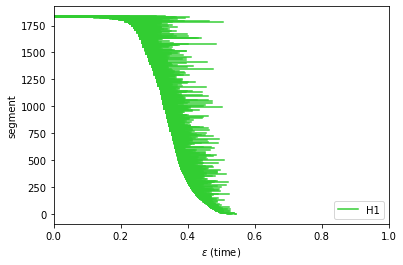

H0: num barcodes 0
H1: num barcodes 2098
max0,976Barcode 1 = 0.15179747343063354
maxBarcode 1 = 0.36823832988739014
middleBarcode 1 = 0.029545456171035767


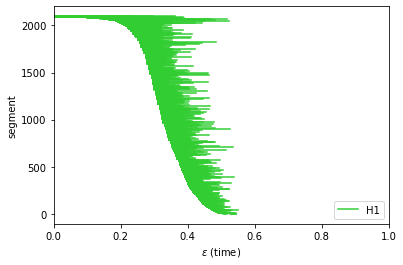

H0: num barcodes 0
H1: num barcodes 1786
max0,976Barcode 1 = 0.2336585521697998
maxBarcode 1 = 0.4584660232067108
middleBarcode 1 = 0.02722775936126709


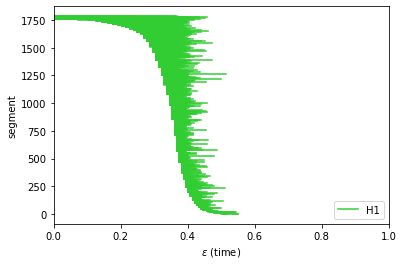

H0: num barcodes 0
H1: num barcodes 2450
max0,976Barcode 1 = 0.15585865080356598
maxBarcode 1 = 0.43898558616638184
middleBarcode 1 = 0.027275025844573975


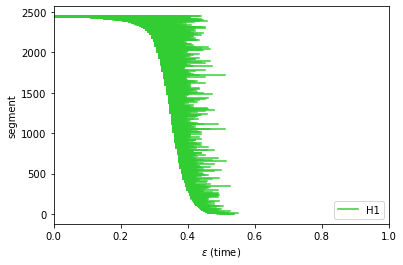

H0: num barcodes 0
H1: num barcodes 2303
max0,976Barcode 1 = 0.15188351273536682
maxBarcode 1 = 0.4063919149339199
middleBarcode 1 = 0.029851317405700684


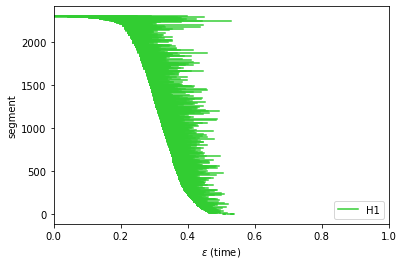

H0: num barcodes 0
H1: num barcodes 1209
max0,976Barcode 1 = 0.12123680114746094
maxBarcode 1 = 0.3215329945087433
middleBarcode 1 = 0.02207133173942566


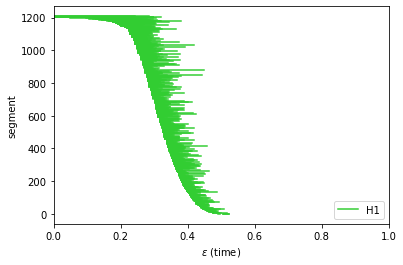

H0: num barcodes 0
H1: num barcodes 2175
max0,976Barcode 1 = 0.19259536266326904
maxBarcode 1 = 0.48585131764411926
middleBarcode 1 = 0.026616573333740234


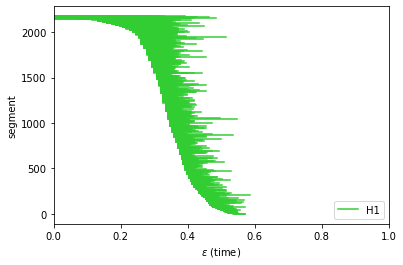

H0: num barcodes 0
H1: num barcodes 2145
max0,976Barcode 1 = 0.1819474697113037
maxBarcode 1 = 0.47693586349487305
middleBarcode 1 = 0.027570724487304688


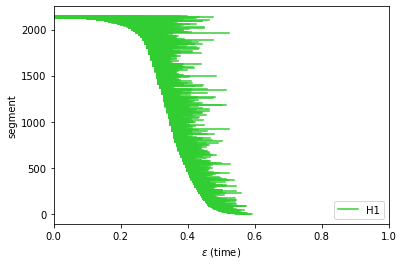

H0: num barcodes 0
H1: num barcodes 2089
max0,976Barcode 1 = 0.1400170922279358
maxBarcode 1 = 0.38659608364105225
middleBarcode 1 = 0.02533966302871704


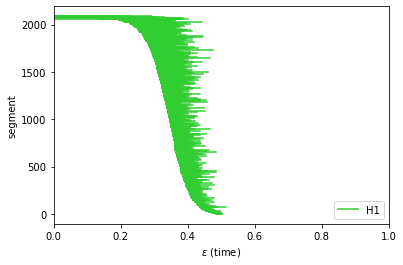

H0: num barcodes 0
H1: num barcodes 2139
max0,976Barcode 1 = 0.16484512388706207
maxBarcode 1 = 0.44849684834480286
middleBarcode 1 = 0.024583160877227783


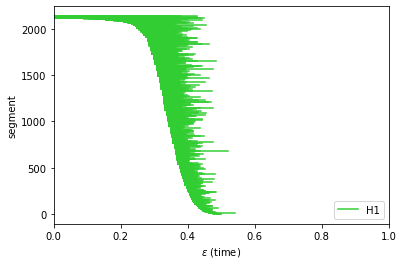

H0: num barcodes 0
H1: num barcodes 1694
max0,976Barcode 1 = 0.09567341208457947
maxBarcode 1 = 0.15806502103805542
middleBarcode 1 = 0.021747052669525146


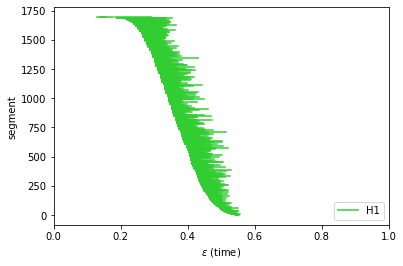

H0: num barcodes 0
H1: num barcodes 2344
max0,976Barcode 1 = 0.1462765336036682
maxBarcode 1 = 0.3099899888038635
middleBarcode 1 = 0.030955970287322998


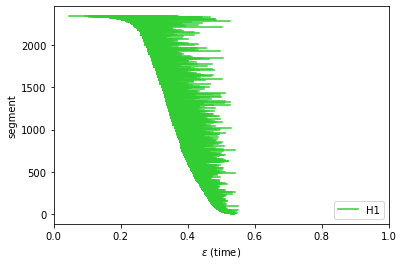

H0: num barcodes 0
H1: num barcodes 2925
max0,976Barcode 1 = 0.05528566241264343
maxBarcode 1 = 0.09978124499320984
middleBarcode 1 = 0.01789209246635437


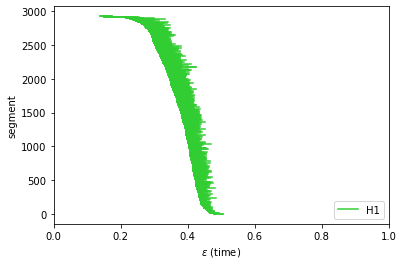

H0: num barcodes 0
H1: num barcodes 803
max0,976Barcode 1 = 0.036894768476486206
maxBarcode 1 = 0.10055744647979736
middleBarcode 1 = 0.007767736911773682


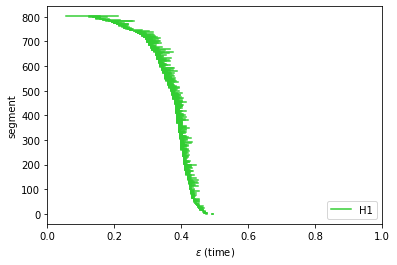

H0: num barcodes 0
H1: num barcodes 1572
max0,976Barcode 1 = 0.06069858372211456
maxBarcode 1 = 0.11738437414169312
middleBarcode 1 = 0.01231086254119873


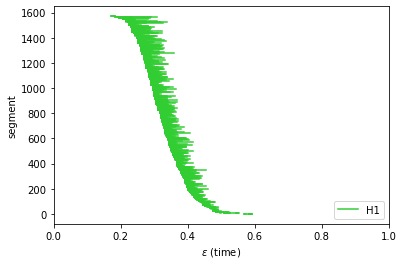

H0: num barcodes 0
H1: num barcodes 1645
max0,976Barcode 1 = 0.06445395946502686
maxBarcode 1 = 0.14413699507713318
middleBarcode 1 = 0.009799480438232422


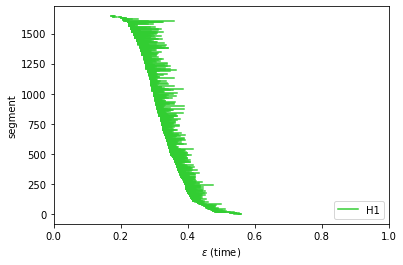

H0: num barcodes 0
H1: num barcodes 1823
max0,976Barcode 1 = 0.04448750615119934
maxBarcode 1 = 0.15504342317581177
middleBarcode 1 = 0.008120149374008179


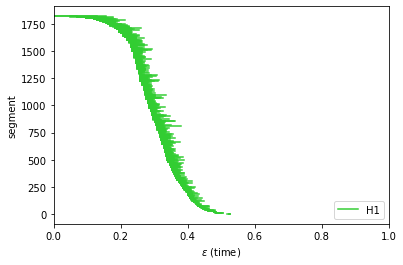

H0: num barcodes 0
H1: num barcodes 1521
max0,976Barcode 1 = 0.0445546954870224
maxBarcode 1 = 0.1468518115580082
middleBarcode 1 = 0.009617149829864502


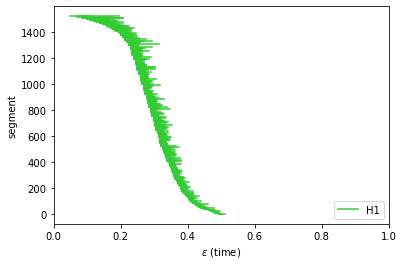

H0: num barcodes 0
H1: num barcodes 1884
max0,976Barcode 1 = 0.03877595067024231
maxBarcode 1 = 0.14586499333381653
middleBarcode 1 = 0.00844380259513855


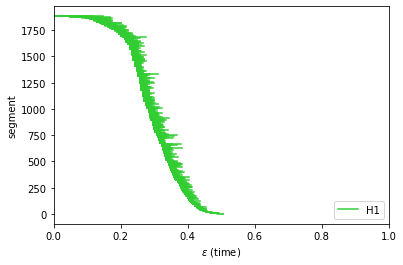

H0: num barcodes 0
H1: num barcodes 1448
max0,976Barcode 1 = 0.04606321454048157
maxBarcode 1 = 0.11004197597503662
middleBarcode 1 = 0.009433746337890625


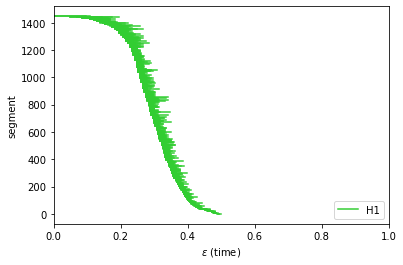

In [20]:
res1 = [0] * len(data)
res2 = [0] * len(data)

for i in range(len(data)):
    a = data[i][0]
    b = data[i][1]
    
    #
    #
    #
    barc = barcodes.calc_embed_dist(a, b, norm = 'quantile')
    barcodes.plot_barcodes(barcodes.barc2array(barc), title = '')
    plt.show()
    
    res1[i] += barcodes.h1sum(barc)
    barcs1.append(barc)
    
    #
    #
    #
    barc = barcodes.calc_embed_dist(b, a, norm = 'quantile')
    barcodes.plot_barcodes(barcodes.barc2array(barc), title = '')
    plt.show()
    
    res2[i] += barcodes.h1sum(barc)
    barcs2.append(barc)

In [30]:
#Shape: square, ellipse, heart
#Scale: 6 values linearly spaced in [0.5, 1]
#Orientation: 40 values in [0, 2 pi]
#Position X: 32 values in [0, 1]
#Position Y: 32 values in [0, 1]

In [33]:
#pickle.dump((res1, res2), open('exp_disent.pickle', 'wb'))
(res1, res2) = pickle.load(open('exp_disent.pickle', 'rb'))

In [34]:
for i in range(len(res1)):
    print(i, res1[i] + res2[i])
    if i == 4:
        print()

0 152.3575938269496
1 180.65933165699244
2 134.68151130527258
3 185.49298052489758
4 163.1745185405016

5 148.19900585711002
6 71.3711933940649
7 53.44431498646736
8 41.208950597792864
9 40.58683807402849
